# Sampling Methods within Turbopanda

The sample extension provides possibilities for creating various
interesting synthetic datasets. We begin with creating
the underlying covariance matrix which contains an
appropriate correlation strength across all dimensions,
and how this extends to multiple subsets.



In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.insert(0, "../../turbopanda/")
import turbopanda as turb

%matplotlib inline

In [2]:
print("turbopanda: %s" % turb.__version__)

turbopanda: 0.2.8


## Sampling the Covariance Matrix

The matrix returned is always symmetric semipositive-definite. By default each
feature has a correlation of $r=0.5$, although this is adjustable. The direction can also
be made to be random or not, meaning a positive $r$ will always yield a positive
correlation if True, or randomly positive/negative otherwise.

In [3]:
cov = turb.sample.covariance_matrix(3)
print(cov)

[[ 0.99680788 -0.49564184 -0.49840394]
 [-0.49564184  0.99128369 -0.49564184]
 [-0.49840394 -0.49564184  0.99752754]]


The off-diagonal values are determined by the `corr_ratio` parameter,
which decides how much to correlate the data, between -1 and 1.

In [ ]:
# highly correlated
cov2 = turb.sample.covariance_matrix(3, 0.8)

# low correlated
cov3 = turb.sample.covariance_matrix(3, -0.2)

## Generating synthetic correlated Gaussian data

Using these correlation matrices, we can generate some correlated synthetic data
which broadly forms clusters of groups:

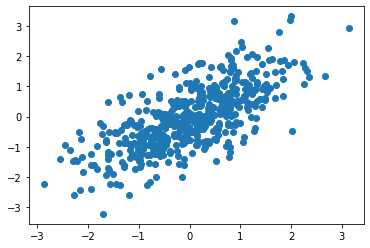

In [4]:
X1 = turb.sample.multivariate_gaussians(500, 2, 0.7)
plt.scatter(X1[:, 0], X1[:, 1])

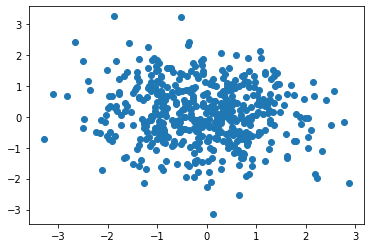

In [5]:
X2 = turb.sample.multivariate_gaussians(500, 2, -0.1)
plt.scatter(X2[:, 0], X2[:, 1])

Note that the distribution is centered with $\mu=0$, and diagonal elements
of $\Sigma$ are close to 1. We can create multiple groups of Gaussians
like:

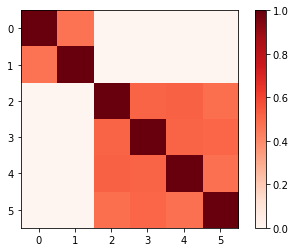

In [15]:
# stacks the groups together into one matrix.
X3 = turb.sample.multivariate_gaussians(500, (2, 4), 0.5)

plt.imshow(np.corrcoef(X3.T), cmap="Reds", vmin=0, vmax=1)
plt.colorbar()

We can use multiple different correlation values to each group
to represent different populations of features:

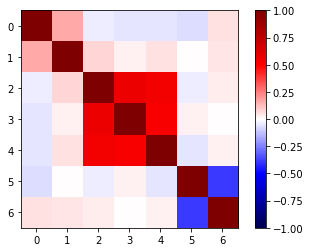

In [12]:
X4 = turb.sample.multivariate_gaussians(500, (2, 3, 2), (0.2, 0.6, -0.4))

plt.imshow(np.corrcoef(X4.T), cmap='seismic', vmin=-1., vmax=1.)
plt.colorbar()